In [19]:
import tensorflow as tf
import os 
import numpy as np 


In [20]:
print(tf.__version__)
print(tf.keras.__version__)


2.20.0
3.13.1


In [21]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 22\\CNN dataset\\')

In [22]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
print (ImageDataGenerator)


<class 'keras.src.legacy.preprocessing.image.ImageDataGenerator'>


In [23]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)



In [24]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [26]:
cnn = tf.keras.models.Sequential()

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [28]:
 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:

cnn.fit(x = training_set, validation_data = test_set, epochs = 25)



Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 187ms/step - accuracy: 0.5785 - loss: 0.6778 - val_accuracy: 0.6295 - val_loss: 0.6396
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.6258 - loss: 0.6472 - val_accuracy: 0.6230 - val_loss: 0.6487
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.6390 - loss: 0.6288 - val_accuracy: 0.6760 - val_loss: 0.6117
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.6726 - loss: 0.6023 - val_accuracy: 0.6670 - val_loss: 0.6191
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - accuracy: 0.6980 - loss: 0.5698 - val_accuracy: 0.7265 - val_loss: 0.5578
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.7247 - loss: 0.5438 - val_accuracy: 0.6695 - val_loss: 0.6277
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.7451 - loss: 0.5145 - val_accuracy: 0.7395 - val_loss: 0.5370
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.7517 - loss: 0

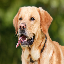

In [45]:
import numpy as np
import tensorflow.keras.preprocessing.image as image
dog_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
dog_image


In [46]:
dog_image = image.img_to_array(dog_image)
dog_image = np.expand_dims(dog_image, axis = 0)
dog_result = cnn.predict(dog_image)
training_set.class_indices
if dog_result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [40]:
print(prediction)

dog


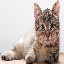

In [41]:

import numpy as np
import tensorflow.keras.preprocessing.image as image
cat_image = image.load_img('single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
cat_image


In [42]:

cat_image= image.img_to_array(cat_image)
cat_image = np.expand_dims(cat_image, axis = 0)
cat_result = cnn.predict(cat_image)
training_set.class_indices
if cat_result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [43]:
print(prediction)

cat


In [44]:
cat_result

array([[0.9999999]], dtype=float32)

In [47]:
cat_result

array([[0.9999999]], dtype=float32)

In [48]:
dog_result

array([[1.]], dtype=float32)